In [1]:
#import libraries
import numpy as np
import matplotlib
from matplotlib import pyplot as plt 
import random
import pickle as pkls

#local files being imported
import platform_opt
from players import *
# import sims
import sim_copy
from statistics import variance
#Note: when indexed as a list: group $A$ is 0, group $B$ is 1.
#      when indexed as a dict: group $A$ is -1, group $B$ is 1.

In [2]:
# SIMULATION PARAMETERS AGNOSTIC TO DATA
T = 14                 # max number of timesteps
M = 100000            # size of unit mass

In [3]:
pi,beta_dist,P,v,c,q = sims.get_params('facebook')

#theta_hat and theta_tilde learned with T = 15, epsilon = 0.05
#since the optimization in the following cell only needs to be run once per set of parameters

#T = 14, epsilon = 1e-4
theta_fair = {1: 0.0, -1: 0.810973068866342}
theta_opt = {1: 4.316992360088821e-11, -1: 0.9999999999745947}
theta_half = {1: 0.5, -1: 0.5}

#T = 12, epsilon = 1e-10
theta_fair = {1: 0.0, -1: 0.8248699654379131}
theta_opt ={1: 4.2866804763043903e-11, -1: 0.9999999999746445}
theta_half = {1: 0.5, -1: 0.5}

#T = 14, epsilon = 1e-10
theta_fair = {1: 0.0, -1: 0.8109288469677634}
theta_opt = {1: 4.316992360088821e-11, -1: 0.9999999999745947}
theta_half = {1: 0.5, -1: 0.5}

In [4]:
#how to show articles at timestep 1
epsilon = 1e-4
    
theta_fair = platform_opt.opt_constrained(pi, q, T, epsilon,c,v,beta_dist, exposure_e=0.1) #constrained with exposure equality
#theta_opt = platform_opt.opt_unconstrained(pi, q, T, epsilon,c,v,beta_dist) #unconstrained to optimize clicks

print(theta_fair)

{1: 0.10010712758312343, -1: 0.7171499626551766}


In [5]:
#run the experiments multiple times for paper results
num_trials = 50

players_list_fair = []
group_one_player_fair = []
shown_fair = []
click_fair = []
share_fair = []
pof_fair = []

players_list_opt = []
group_one_player_fair = []
shown_opt = []
click_opt = []
share_opt = []
pof_opt = []

players_list_half = []
group_one_player_fair = []
shown_half = []
click_half = []
share_half = []
pof_half = []

for i in range(num_trials):
    #players_in_model_fair, shown_d_fair, click_d_fair, share_d_fair = sims.runModel(theta_fair, T, pi, M, P, beta_dist, v,c,q)
    players_in_model_fair, shown_d_fair, click_d_fair, share_d_fair, group_one_fair = sims.runModel(theta_fair, T, pi, M, P, beta_dist, v,c,q)
    players_in_model_opt, shown_d_opt, click_d_opt, share_d_opt, group_one_opt  = sims.runModel(theta_opt, T, pi, M, P, beta_dist, v,c,q)
    players_in_model_half, shown_d_half, click_d_half, share_d_half, group_one_half  = sims.runModel(theta_half, T, pi, M, P, beta_dist, v,c,q)
    
    players_list_fair.append(players_in_model_fair + ([0] * (T - len(players_in_model_fair))))
    shown_fair.append(shown_d_fair)
    click_fair.append(click_d_fair)
    share_fair.append(share_d_fair)
    group_one_player_fair
    pof_fair.append(sum(players_in_model_fair[1:]))
    
    players_list_opt.append(players_in_model_opt + ([0] * (T - len(players_in_model_opt))))
    shown_opt.append(shown_d_opt)
    click_opt.append(click_d_opt)
    share_opt.append(share_d_opt)
    pof_opt.append(sum(players_in_model_opt[1:]))
    
    
    players_list_half.append(players_in_model_half + ([0] * (T - len(players_in_model_half))))
    shown_half.append(shown_d_half)
    click_half.append(click_d_half)
    share_half.append(share_d_half)
    pof_half.append(sum(players_in_model_half[1:]))


In [6]:
#pickle the data if needed
sims.saveRuns(players_list_fair, 'simulation_data/players_list_fair.pkl')
sims.saveRuns(shown_fair, 'simulation_data/shown_fair.pkl')
sims.saveRuns(click_fair, 'simulation_data/click_fair.pkl')
sims.saveRuns(share_fair, 'simulation_data/share_fair.pkl')
sims.saveRuns(pof_fair, 'simulation_data/pof_fair.pkl')

sims.saveRuns(players_list_opt, 'simulation_data/players_list_opt.pkl')
sims.saveRuns(shown_opt, 'simulation_data/shown_opt.pkl')
sims.saveRuns(click_opt, 'simulation_data/click_opt.pkl')
sims.saveRuns(share_opt, 'simulation_data/share_opt.pkl')
sims.saveRuns(pof_opt, 'simulation_data/pof_opt.pkl')

sims.saveRuns(players_list_half, 'simulation_data/players_list_half.pkl')
sims.saveRuns(shown_half, 'simulation_data/shown_half.pkl')
sims.saveRuns(click_half, 'simulation_data/click_half.pkl')
sims.saveRuns(share_half, 'simulation_data/share_half.pkl')
sims.saveRuns(pof_half, 'simulation_data/pof_half.pkl')

In [7]:
#unpickle the data as needed
#pickle the data if needed
players_list_fair = sims.loadRuns('simulation_data/players_list_fair.pkl')
shown_fair = sims.loadRuns('simulation_data/shown_fair.pkl')
click_fair = sims.loadRuns('simulation_data/click_fair.pkl')
share_fair = sims.loadRuns('simulation_data/share_fair.pkl')
pof_fair = sims.loadRuns('simulation_data/pof_fair.pkl')

players_list_opt = sims.loadRuns('simulation_data/players_list_opt.pkl')
shown_opt = sims.loadRuns('simulation_data/shown_opt.pkl')
click_opt = sims.loadRuns('simulation_data/click_opt.pkl')
share_opt = sims.loadRuns('simulation_data/share_opt.pkl')
pof_opt = sims.loadRuns('simulation_data/pof_opt.pkl')

players_list_half = sims.loadRuns('simulation_data/players_list_half.pkl')
shown_half = sims.loadRuns('simulation_data/shown_half.pkl')
click_half = sims.loadRuns('simulation_data/click_half.pkl')
share_half = sims.loadRuns('simulation_data/share_half.pkl')
pof_half = sims.loadRuns('simulation_data/pof_half.pkl')

In [8]:
#average intergroup exposure and share
#normalized by number of impressions/clicks in model
#higher is better here
print("Intergroup exposure and shares subject to fairness constraints")
show_avg_mp_fair = np.mean([x[(-1,1)] for x in shown_fair])
show_avg_pm_fair = np.mean([x[(1,-1)] for x in shown_fair])
print((show_avg_mp_fair + show_avg_pm_fair) / np.mean(players_list_fair))

share_avg_mp_fair = np.mean([x[(-1,1)] for x in share_fair])
share_avg_pm_fair = np.mean([x[(1,-1)] for x in share_fair])
denom_fair = [x[1:] for x in players_list_fair]
print((share_avg_mp_fair + share_avg_pm_fair) / np.mean(denom_fair)) 

print("Intergroup exposure and shares unconstrained")
show_avg_mp_opt = np.mean([x[(-1,1)] for x in shown_opt])
show_avg_pm_opt = np.mean([x[(1,-1)] for x in shown_opt])
print((show_avg_mp_opt + show_avg_pm_opt) / np.mean(players_list_opt))

share_avg_mp_opt = np.mean([x[(-1,1)] for x in share_opt])
share_avg_pm_opt = np.mean([x[(1,-1)] for x in share_opt])
denom_opt = [x[1:] for x in players_list_opt]
print((share_avg_mp_opt + share_avg_pm_opt) / np.mean(denom_opt))

print("Intergroup exposure and shares half exposure")
show_avg_mp_half = np.mean([x[(-1,1)] for x in shown_half])
show_avg_pm_half = np.mean([x[(1,-1)] for x in shown_half])
print((show_avg_mp_half + show_avg_pm_half) / np.mean(players_list_half))

share_avg_mp_half = np.mean([x[(-1,1)] for x in share_half])
share_avg_pm_half = np.mean([x[(1,-1)] for x in share_half])
denom_half = [x[1:] for x in players_list_half]
print((share_avg_mp_half + share_avg_pm_half) / np.mean(denom_half)) 

Intergroup exposure and shares subject to fairness constraints
3.242483392686679
0.37638937294135333
Intergroup exposure and shares unconstrained
1.4973744664958966
0.16623138030225112
Intergroup exposure and shares half exposure
6.4691354919836535
1.1812261266888004


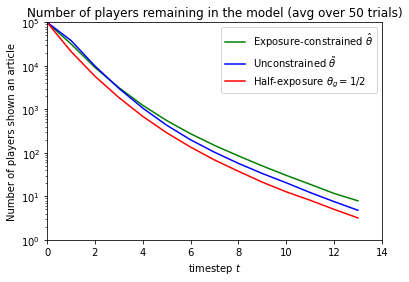

In [9]:
#eb_fair = sims.calc_errorbars(players_list_fair)
#eb_opt = sims.calc_errorbars(players_list_opt)
#eb_half = sims.calc_errorbars(players_list_half)

#plt.errorbar(np.arange(T), np.mean(players_list_fair, axis=0), yerr=eb_fair, color='green')
#plt.errorbar(np.arange(T), np.mean(players_list_opt, axis=0), yerr=eb_opt, color='blue')
#plt.errorbar(np.arange(T), np.mean(players_list_half, axis=0), yerr=eb_half, color='red')

plt.plot(np.mean(players_list_fair, axis=0), color='green')
plt.plot(np.mean(players_list_opt, axis=0), color='blue')
plt.plot(np.mean(players_list_half, axis=0), color='red')
plt.title("Number of players remaining in the model (avg over %i trials)" % (num_trials))
plt.ylabel("Number of players shown an article")
plt.xlabel("timestep $t$")
plt.yscale('log')
plt.xlim((0,T))
plt.ylim((1, M))
plt.legend(('Exposure-constrained $\hat \\theta$', 'Unconstrained $\\tilde \\theta$', 'Half-exposure $\\theta_g = 1/2$'))
plt.show()

[None, None, None, None, None, None]

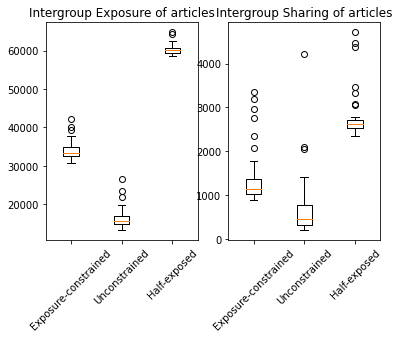

In [10]:
#calculate boxplot data
intergroup_fair_shown = [x[(-1,1)] + x[(1,-1)] for x in shown_fair]
intergroup_fair_share = [x[(-1,1)] + x[(1,-1)] for x in share_fair]

intergroup_opt_shown = [x[(-1,1)] + x[(1,-1)] for x in shown_opt]
intergroup_opt_share = [x[(-1,1)] + x[(1,-1)] for x in share_opt]

intergroup_half_shown = [x[(-1,1)] + x[(1,-1)] for x in shown_half]
intergroup_half_share = [x[(-1,1)] + x[(1,-1)] for x in share_half]

# plot data
fig1, (ax1, ax2) = plt.subplots(1,2)

ax1.set_title('Intergroup Exposure of articles')
ax1.boxplot([intergroup_fair_shown, intergroup_opt_shown, intergroup_half_shown], labels=['Exposure-constrained', 'Unconstrained', 'Half-exposed'])

ax2.set_title('Intergroup Sharing of articles')
ax2.boxplot([intergroup_fair_share, intergroup_opt_share, intergroup_half_share], labels=['Exposure-constrained', 'Unconstrained', 'Half-exposed'])

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

[None, None, None, None, None, None]

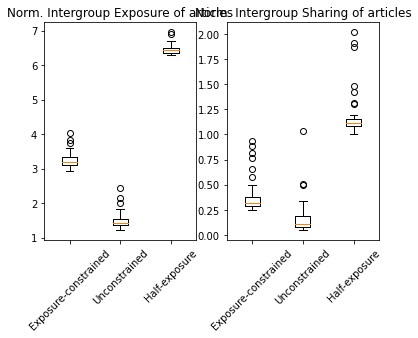

In [11]:
#calculate boxplot data, normalized by exposure size
intergroup_fair_shown = [(x[(-1,1)] + x[(1,-1)]) / np.mean(players_list_fair) for x in shown_fair]
intergroup_fair_share = [(x[(-1,1)] + x[(1,-1)]) / np.mean(denom_fair) for x in share_fair]

intergroup_opt_shown = [(x[(-1,1)] + x[(1,-1)]) / np.mean(players_list_opt) for x in shown_opt]
intergroup_opt_share = [(x[(-1,1)] + x[(1,-1)]) / np.mean(denom_opt) for x in share_opt]

intergroup_half_shown = [(x[(-1,1)] + x[(1,-1)]) / np.mean(players_list_half) for x in shown_half]
intergroup_half_share = [(x[(-1,1)] + x[(1,-1)]) / np.mean(denom_half) for x in share_half]

# plot data
fig1, (ax1, ax2) = plt.subplots(1,2)

ax1.set_title('Norm. Intergroup Exposure of articles')
ax1.boxplot([intergroup_fair_shown, intergroup_opt_shown, intergroup_half_shown], labels=['Exposure-constrained', 'Unconstrained', 'Half-exposure'])

ax2.set_title('Norm. Intergroup Sharing of articles')
ax2.boxplot([intergroup_fair_share, intergroup_opt_share, intergroup_half_share], labels=['Exposure-constrained', 'Unconstrained', 'Half-exposure'])

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

1.1697451391242915


{'whiskers': [<matplotlib.lines.Line2D at 0x1383f6e80>,
 'caps': [<matplotlib.lines.Line2D at 0x136f9b320>,
 'boxes': [<matplotlib.lines.Line2D at 0x1383f6748>],
 'medians': [<matplotlib.lines.Line2D at 0x135844908>],
 'fliers': [<matplotlib.lines.Line2D at 0x135844e10>],
 'means': []}

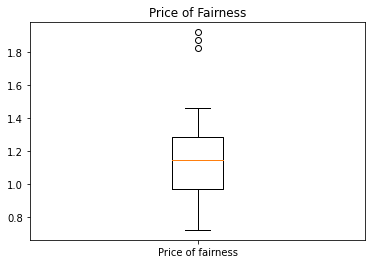

In [12]:
#boxplot for price of fairness
pof = [pof_opt[i] / pof_fair[i] for i in range(len(pof_opt))]
print(np.mean(pof))

fig1, ax1 = plt.subplots()

ax1.set_title('Price of Fairness')
ax1.boxplot(pof, labels=['Price of fairness'])

{(1, 1): 62846, (-1, 1): 9719, (1, -1): 22830, (-1, -1): 46718}
{(1, 1): 69547, (-1, 1): 6763, (1, -1): 9808, (-1, -1): 67014}
{(1, 1): 36121, (-1, 1): 29769, (1, -1): 30764, (-1, -1): 33772}
153132


[None, None, None, None, None, None]

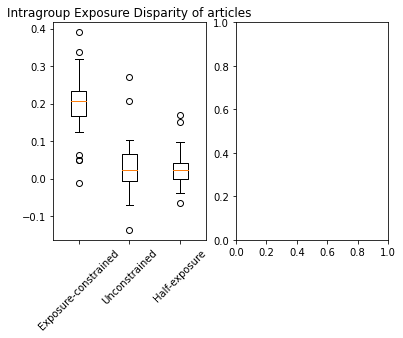

In [13]:
#calculate boxplots for difference in exposure 
#should be close to 0
# if np.abs removed, positive means article B shown more
print(shown_fair[0])
print(shown_opt[0])
print(shown_half[0])


impressions_fair = [sum(x)for x in players_list_fair]
exposure_disparity_fair_intra = [((x[(1,1)] / (pi[1] * impressions_fair[i]) - x[(-1,-1)] / (pi[-1] * impressions_fair[i]))) for i,x in enumerate(shown_fair)]
exposure_disparity_fair = [(((x[(1,1)] + x[(-1,1)]) / (pi[1] * M) - (x[(-1,-1)] + x[(1,-1)]) / (pi[-1] * M))) for x in shown_fair]

impressions_opt = [sum(x) for x in players_list_opt]
print(impressions_opt[0])
exposure_disparity_opt_intra = [((x[(1,1)] / (pi[1] * impressions_opt[i]) - x[(-1,-1)] / (pi[-1] * impressions_opt[i]))) for i,x in enumerate(shown_opt)]
exposure_disparity_opt = [(((x[(1,1)] + x[(-1,1)]) / (pi[1] * M) - (x[(-1,-1)] + x[(1,-1)]) / (pi[-1] * M))) for x in shown_opt]

impressions_half = [sum(x)for x in players_list_half]
exposure_disparity_half_intra = [((x[(1,1)] / (pi[1] * impressions_half[i]) - x[(-1,-1)] / (pi[-1] * impressions_half[i]))) for i,x in enumerate(shown_half)]
exposure_disparity_half = [(((x[(1,1)] + x[(-1,1)]) / (pi[1] * M) - (x[(-1,-1)] + x[(1,-1)]) / (pi[-1] * M))) for x in shown_half]

# plot data
fig1, (ax1,ax2) = plt.subplots(1,2)

ax1.set_title('Intragroup Exposure Disparity of articles')
ax1.boxplot([exposure_disparity_fair_intra, exposure_disparity_opt_intra, exposure_disparity_half_intra], labels=['Exposure-constrained', 'Unconstrained', 'Half-exposure'])
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

#ax2.set_title('Exposure Disparity of articles')
#ax2.boxplot([exposure_disparity_fair, exposure_disparity_opt, exposure_disparity_half], labels=['Exposure-constrained', 'Unconstrained', 'Half-exposure'])
#plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

In [14]:
T=10
theta_A = {}
theta_B = {}
for exp in [0., 0.01, 0.05, 0.1, 0.2, 0.25]:
    theta_fair = platform_opt.opt_constrained(pi, q, T, epsilon,c,v,beta_dist, exposure_e=exp) #constrained with exposure equality 
    theta_A[exp] = theta_fair[-1]
    theta_B[exp] = theta_fair[1]
    
list_A = sorted(theta_A.items()) # sorted by key, return a list of tuples
eps_A, thetaA = zip(*list_A) # unpack a list of pairs into two tuples

list_B = sorted(theta_B.items()) # sorted by key, return a list of tuples
eps_B, thetaB = zip(*list_B) # unpack a list of pairs into two tuples



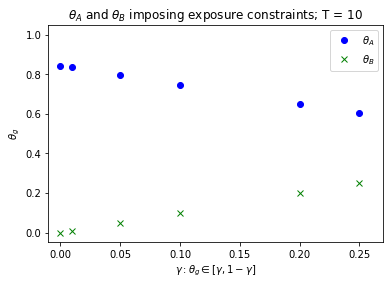

In [15]:
plt.plot(eps_A, thetaA, 'bo')
plt.plot(eps_B, thetaB, 'gx')
plt.xlim((-0.01,0.27))
plt.ylim((-0.05,1.05))
plt.title('$\\theta_A$ and $\\theta_B$ imposing exposure constraints; T = %i' % (T))
plt.legend(['$\\theta_A$', '$\\theta_B$'])
plt.xlabel('$\\gamma : \\theta_g \\in [\\gamma, 1-\\gamma]$')
plt.ylabel('$\\theta_g$')
plt.show()

In [16]:
print(theta_A)
print(theta_B)

{0.0: 0.8446670151721517, 0.01: 0.8350687831401356, 0.05: 0.7966447080162378, 0.1: 0.7484576627919588, 0.2: 0.6525285221674063, 0.25: 0.6043830143109054}
{0.0: 1.1855115191497092e-05, 0.01: 0.010001816429252254, 0.05: 0.04998539027786838, 0.1: 0.10008442718923215, 0.2: 0.19994352665412324, 0.25: 0.2500109193176579}


In [17]:
import numpy as np
import seaborn as sns

#heatmap varying q_A and q_B
num_trials = 20
M = 10000
pi= {-1: 0.5, 1: 0.5}

T = 6
epsilon = 0.001        
c = {(1,1): 1., (-1,1): 1., (1,-1): 1., (-1,-1): 1.}
v = {( 1,  1):   2000.,
     (-1,  1):   500.,
     ( 1, -1):   500.,
     (-1, -1):   2000. }
#beta_dist = {(1,1) : (0.9541492709534125, 1.345006644515015),
#                    (-1,1) : (0.1822515775580026, 2.7574965182522644),
#                    (1,-1) : (0.09576097403924465, 3.09136619146736),
#                    (-1,-1): (0.8828729918440646, 1.6247070146941363)}

beta_dist = {(1,1) : (1., 1.),
                    (-1,1) : (1., 1.),
                    (1,-1) : (1., 1.),
                    (-1,-1): (1., 1.)}

P = {}
for a in [-1,1]:
    for g in [-1,1]:
        P[(a,g)] = beta_dist[(a,g)][0] / (beta_dist[(a,g)][0] +  beta_dist[(a,g)][1])


share_list = []
ig_share_list = [] #intergroup shares

st = 0.1
n = np.arange(0.5, 1.01, step=st).shape[0]
data = np.zeros((n,n))
ig_data = np.zeros((n,n))


for k,q_A in enumerate(np.arange(0.5, 1.01, step=st)):
    for j,q_B in enumerate(np.arange(0.5, 1.01, step=st)):
        q = {-1: q_A, 1: q_B}
        print('q: ' + str(q))
        theta_fair = platform_opt.opt_constrained(pi, q, T, epsilon,c,v,beta_dist, exposure_e=0.0)
        print('Theta:  ' + str(theta_fair))
        for i in range(num_trials):
            players_in_model_fair, shown_d_fair, click_d_fair, share_d_fair = sims.runModel(theta_fair, T, pi, M, P, beta_dist, v,c,q)
            share_list.append(sum([share_d_fair[key] for key in share_d_fair.keys()]))
            ig_share_list.append(sum([share_d_fair[key] for key in share_d_fair.keys() if key[0] == -key[1]]))
                     
        data[k,j] = np.mean(share_list)
        ig_data[k,j] = np.mean(ig_share_list)
                    


/Users/knaggita/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


q: {-1: 0.5, 1: 0.5}
Theta:  {1: 0.0, -1: 0.9213427319988177}
q: {-1: 0.5, 1: 0.55}
Theta:  {1: 3.0504998738457984e-30, -1: 0.9931757243938164}
q: {-1: 0.5, 1: 0.6000000000000001}
Theta:  {1: 0.06231121144409447, -1: 1.0}
q: {-1: 0.5, 1: 0.6500000000000001}
Theta:  {1: 0.13344767881991135, -1: 1.0}
q: {-1: 0.5, 1: 0.7000000000000002}
Theta:  {1: 0.2052939739446283, -1: 1.0}
q: {-1: 0.5, 1: 0.7500000000000002}
Theta:  {1: 0.27713238321752803, -1: 1.0}
q: {-1: 0.5, 1: 0.8000000000000003}
Theta:  {1: 0.34823234216061577, -1: 0.9999999999999999}
q: {-1: 0.5, 1: 0.8500000000000003}
Theta:  {1: 0.4178840233364246, -1: 1.0}
q: {-1: 0.5, 1: 0.9000000000000004}
Theta:  {1: 0.48542975457158943, -1: 1.0}
q: {-1: 0.5, 1: 0.9500000000000004}
Theta:  {1: 0.5502903822375136, -1: 1.0}
q: {-1: 0.5, 1: 1.0000000000000004}
Theta:  {1: 0.6119845356805809, -1: 1.0}
q: {-1: 0.55, 1: 0.5}
Theta:  {1: 1.7803730074313195e-22, -1: 0.8641372371523334}
q: {-1: 0.55, 1: 0.55}
Theta:  {1: 1.7556647630476207e-22, -1

q: {-1: 0.9000000000000004, 1: 0.5}
Theta:  {1: 2.710904900226247e-30, -1: 0.4816207150798365}
q: {-1: 0.9000000000000004, 1: 0.55}
Theta:  {1: 9.350534399947246e-23, -1: 0.5233678169421544}
q: {-1: 0.9000000000000004, 1: 0.6000000000000001}
Theta:  {1: 9.191645201650134e-23, -1: 0.5703477278315832}
q: {-1: 0.9000000000000004, 1: 0.6500000000000001}
Theta:  {1: 9.002444656099661e-23, -1: 0.623148316689758}
q: {-1: 0.9000000000000004, 1: 0.7000000000000002}
Theta:  {1: 8.756195382455815e-23, -1: 0.682396363182568}
q: {-1: 0.9000000000000004, 1: 0.7500000000000002}
Theta:  {1: 0.0, -1: 0.7487577868993713}
q: {-1: 0.9000000000000004, 1: 0.8000000000000003}
Theta:  {1: 8.101683341807283e-23, -1: 0.8229378422778859}
q: {-1: 0.9000000000000004, 1: 0.8500000000000003}
Theta:  {1: 0.0, -1: 0.9056812749739414}
q: {-1: 0.9000000000000004, 1: 0.9000000000000004}
Theta:  {1: 5.076522174622747e-27, -1: 0.9977724353028338}
q: {-1: 0.9000000000000004, 1: 0.9500000000000004}
Theta:  {1: 0.090292675516

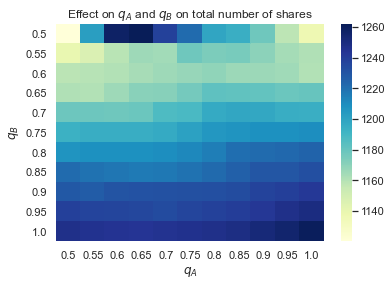

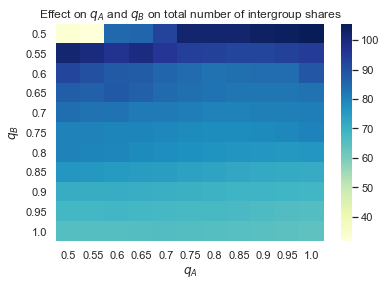

In [18]:
#fig, (ax1,ax2) = plt.subplots(1,2)
sns.set()
ax = sns.heatmap(data,cmap="YlGnBu", xticklabels=[np.round(x,2) for x in np.arange(0.5, 1.01, step=st)], yticklabels=[np.round(x,2) for x in np.arange(0.5, 1.01, step=st)])
plt.title("Effect on $q_A$ and $q_B$ on total number of shares")
plt.xlabel("$q_A$")
plt.ylabel("$q_B$")
plt.show()


sns.set()
ax = sns.heatmap(ig_data,cmap="YlGnBu", xticklabels=[np.round(x,2) for x in np.arange(0.5, 1.01, step=st)], yticklabels=[np.round(x,2) for x in np.arange(0.5, 1.01, step=st)])
plt.title("Effect on $q_A$ and $q_B$ on total number of intergroup shares")
plt.xlabel("$q_A$")
plt.ylabel("$q_B$")
plt.show()

In [26]:
#varying psi
#import numpy as np
#import seaborn as sns

#heatmap varying Psi
num_trials = 10
M = 10000
pi= {-1: 0.5, 1: 0.5}

T = 6
epsilon = 0.001        
c = {(1,1): 1., (-1,1): 1., (1,-1): 1., (-1,-1): 1.}

#beta_dist = {(1,1) : (0.9541492709534125, 1.345006644515015),
#                    (-1,1) : (0.1822515775580026, 2.7574965182522644),
#                    (1,-1) : (0.09576097403924465, 3.09136619146736),
#                    (-1,-1): (0.8828729918440646, 1.6247070146941363)}

beta_dist = {(1,1) : (1., 1.),
                    (-1,1) : (1., 1.),
                    (1,-1) : (1., 1.),
                    (-1,-1): (1., 1.)}

P = {}
for a in [-1,1]:
    for g in [-1,1]:
        P[(a,g)] = beta_dist[(a,g)][0] / (beta_dist[(a,g)][0] +  beta_dist[(a,g)][1])

q = {1: 0.8, -1: 0.8}

share_list = []
ig_share_list = [] #intergroup shares

st = 500
rng_min = 500
rng_max = 2501
n = np.arange(rng_min, rng_max, step=st).shape[0]
data = np.zeros((n,n))
ig_data = np.zeros((n,n))


for k,intra in enumerate(np.arange(rng_min, rng_max, step=st)):
    for j,inter in enumerate(np.arange(rng_min, rng_max, step=st)):
        v = {(1,1): intra, (-1,1): inter, (1,-1): inter, (-1,-1):intra }
        print('v: ' + str(v))
        theta_fair = platform_opt.opt_constrained(pi, q, T, epsilon,c,v,beta_dist, exposure_e=0.0)
        print('Theta:  ' + str(theta_fair))
        for i in range(num_trials):
            players_in_model_fair, shown_d_fair, click_d_fair, share_d_fair = sims.runModel(theta_fair, T, pi, M, P, beta_dist, v,c,q)
            share_list.append(sum([share_d_fair[key] for key in share_d_fair.keys()]))
            ig_share_list.append(sum([share_d_fair[key] for key in share_d_fair.keys() if key[0] == -key[1]]))
                     
        data[k,j] = np.mean(share_list)
        ig_data[k,j] = np.mean(ig_share_list)
                    


v: {(1, 1): 500, (-1, 1): 500, (1, -1): 500, (-1, -1): 500}
Theta:  {1: 0.4999999998326132, -1: 0.49999999957674063}
v: {(1, 1): 500, (-1, 1): 1000, (1, -1): 1000, (-1, -1): 500}
Theta:  {1: 0.9999999945279046, -1: 5.472375295429839e-09}
v: {(1, 1): 500, (-1, 1): 1500, (1, -1): 1500, (-1, -1): 500}
Theta:  {1: 0.9999999951528067, -1: 4.8474165035091135e-09}
v: {(1, 1): 500, (-1, 1): 2000, (1, -1): 2000, (-1, -1): 500}
Theta:  {1: 0.9999999954019446, -1: 4.598246654035808e-09}
v: {(1, 1): 500, (-1, 1): 2500, (1, -1): 2500, (-1, -1): 500}
Theta:  {1: 0.999999995538249, -1: 4.4619235143956195e-09}
v: {(1, 1): 1000, (-1, 1): 500, (1, -1): 500, (-1, -1): 1000}
Theta:  {1: 5.473092355769977e-09, -1: 0.9999999945271876}
v: {(1, 1): 1000, (-1, 1): 1000, (1, -1): 1000, (-1, -1): 1000}
Theta:  {1: 0.49999999989649, -1: 0.4999999995135501}
v: {(1, 1): 1000, (-1, 1): 1500, (1, -1): 1500, (-1, -1): 1000}
Theta:  {1: 0.9999999914404817, -1: 8.559843716679238e-09}
v: {(1, 1): 1000, (-1, 1): 2000, (1,

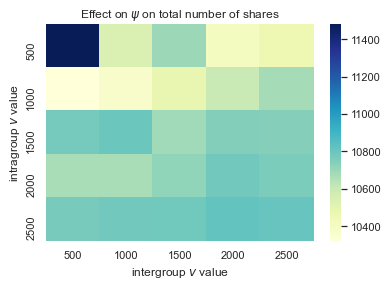

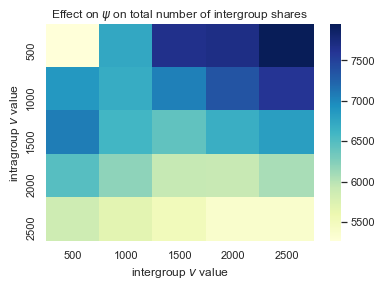

In [28]:
#print(share_list)
#print(ig_share_list)
sns.set()
ax = sns.heatmap(data,cmap="YlGnBu", xticklabels=[np.round(x,2) for x in np.arange(rng_min, rng_max, step=st)], yticklabels=[np.round(x,2) for x in np.arange(rng_min, rng_max, step=st)])
plt.title("Effect on $\\psi$ on total number of shares")
plt.xlabel("intergroup $v$ value")
plt.ylabel("intragroup $v$ value")
plt.show()


sns.set()
ax = sns.heatmap(ig_data,cmap="YlGnBu", xticklabels=[np.round(x,2) for x in np.arange(rng_min, rng_max, step=st)], yticklabels=[np.round(x,2) for x in np.arange(rng_min, rng_max, step=st)])
plt.title("Effect on $\\psi$ on total number of intergroup shares")
plt.xlabel("intergroup $v$ value")
plt.ylabel("intragroup $v$ value")
plt.show()